## Cpu implementation of feed forward neural network for a trivial binary classification model with tensorflow

In [2]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sn
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

### Upload the dataset 

In [3]:
data = np.load('/Users/marcosalvalaggio/code/xeye/notebooks/data/TrivialBinaryClassification.npz')
data.files

['X_train', 'X_test', 'y_train', 'y_test']

In [4]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [5]:
# Dataset dimensions (num of images, height, width)
print(f'X_train dataset shape: {X_train.shape}')
print(f'X_test dataset shape: {X_test.shape}')

X_train dataset shape: (1600, 100, 100)
X_test dataset shape: (400, 100, 100)


In [6]:
# Labels 
print(y_train.shape)
print(y_test.shape)

(1600,)
(400,)


### Visualize a single image from train dataset 

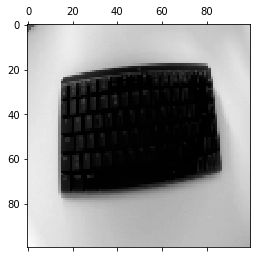

In [7]:
plt.matshow(X_train[100],cmap='gray')

Schema for map y values to category labels:

* keyboard = 0
* mouse = 1 

In [8]:
print(f'X_train[100]: {y_train[100]}')
print(f'Label for X_train[100]: keyboard')

X_train[100]: 0
Label for X_train[100]: keyboard


### Preprocessing 

In [9]:
#Min-max feature scaling = values of single pixel between [0,1] instead of [0 = black , 255 = white]
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# First train dataset image scaled 
X_train[0,:,:]

array([[0.00392157, 0.00392157, 0.00392157, ..., 0.41176471, 0.4       ,
        0.30588235],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.41960784, 0.40392157,
        0.31764706],
       [0.01176471, 0.00784314, 0.00392157, ..., 0.42745098, 0.41568627,
        0.31764706],
       ...,
       [0.01960784, 0.12941176, 0.60392157, ..., 0.64313725, 0.63137255,
        0.63529412],
       [0.00784314, 0.00784314, 0.14117647, ..., 0.63529412, 0.63137255,
        0.62745098],
       [0.09411765, 0.00784314, 0.00784314, ..., 0.63137255, 0.62745098,
        0.62745098]])

Flatteing operation is necessary in order to pass the pixel values of the image to the input layer of the feed forward neural network. 

In [11]:
# Flattening
# dimensions = (num. of images, height x width)
X_train_flattened = X_train.reshape(len(X_train), 100*100)
X_test_flattened = X_test.reshape(len(X_test), 100*100)

In [12]:
print(f'X_train flattened dataset shape: {X_train_flattened.shape}')
print(f'X_test flattened dataset shape: {X_test_flattened.shape}')

X_train flattened dataset shape: (1600, 10000)
X_test flattened dataset shape: (400, 10000)


### Simple FFNN implemenation 

In [13]:
# Hyperparameters 
output_class = 1
input_shape = 10000 # height x width
hidden_nodes = 10
verbose = 1
epochs = 5
batch = 800

In [14]:
# FFNN with only one hidden layer 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hidden_nodes, input_shape=(input_shape,), name='dense_layer', activation='relu'))
model.add(tf.keras.layers.Dense(output_class, name='dense_layer_2', activation='sigmoid'))
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                100010    
                                                                 
 dense_layer_2 (Dense)       (None, 1)                 11        
                                                                 
Total params: 100,021
Trainable params: 100,021
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Specific options for the training phase: type of upgrade method of the weights in the backpropagation (e.g. SGD or adam...), and the type of loss function... 
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

### Train the model 

In [16]:
model.fit(X_train_flattened, y_train, epochs=epochs, batch_size= batch, verbose = 1)

Epoch 1/5
2/2 [==============================] - 1s 14ms/step - loss: 0.6330 - accuracy: 0.4644
Epoch 2/5
2/2 [==============================] - 0s 10ms/step - loss: 0.9942 - accuracy: 0.5106
Epoch 3/5
2/2 [==============================] - 0s 13ms/step - loss: 0.9010 - accuracy: 0.5362
Epoch 4/5
2/2 [==============================] - 0s 17ms/step - loss: 0.1509 - accuracy: 0.9656
Epoch 5/5
2/2 [==============================] - 0s 15ms/step - loss: 0.0506 - accuracy: 0.9944


In [17]:
test_loss, test_acc = model.evaluate(X_test_flattened, y_test, batch_size = 128)
test_acc

4/4 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.9975


0.9975000023841858

### Prediction of a label for a new "virtual" image passed in input to the trained model 

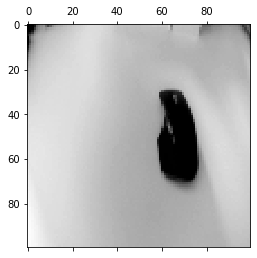

In [18]:
index = 0
plt.matshow(X_test[index],cmap='gray')

In [19]:
print(f'X_test[index]: {y_test[index]}')
print(f'Label for X_test[index]: mouse')

X_test[index]: 1
Label for X_test[index]: mouse


In [20]:
# Reshape to pass the image to the input layer of the network 
frame = X_test_flattened[index]
frame = frame.reshape((1,10000))
frame.shape

(1, 10000)

In [21]:
predict = model.predict(frame)

1/1 [==============================] - 0s 60ms/step


In [22]:
# value of the output node of the network 
predict

array([[0.9629744]], dtype=float32)

In [23]:
label = (predict > 0.5).astype("int32")
print(f'y predicted = {label[0][0]}')
print(f'Label predicted = mouse')

y predicted = 1
Label predicted = mouse


### Confusion matrix 

In [24]:
predictTest = model.predict(X_test_flattened)
predictTest.shape

13/13 [==============================] - 0s 8ms/step


(400, 1)

In [25]:
pred = (predictTest > 0.5).astype("int32")
pred.shape

(400, 1)

In [26]:
cm = tf.math.confusion_matrix(y_test, pred, dtype=tf.dtypes.int32)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[206,   1],
       [  0, 193]], dtype=int32)>

<AxesSubplot:>

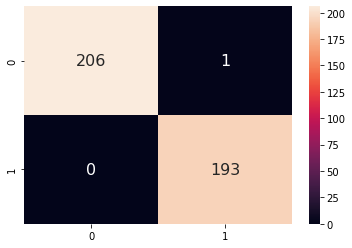

In [27]:
sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size